In [1]:
import torch
import PIL
import numpy as np
from PIL import Image
from tqdm import tqdm

In [2]:
def cluster(x):
    out = []
    # Iterate each row
    for i in tqdm(range(len(x))):
        if i-1 < 0:
            out.append(torch.mean(x[i:i+2], dim=0))

        elif i+1 < len(x):
            frame = torch.stack([x[i-1], x[i+1]]).to("cuda")
            diffs = torch.stack([ abs(x[i]-x[i-1]), abs(x[i]-x[i+1])])
            index = torch.min(diffs, dim=0).indices[:,0]
            minvl = torch.stack([frame[j,i,:] for i,j in enumerate(index)])
            out.append(torch.mean(torch.stack([minvl, x[i]]), dim=0))

        else:
            out.append(torch.mean(x[i-1:i+1], dim=0))
    # Stack 
    out = torch.stack(out, dim=0)
    
    return out.type(torch.uint8)


def cluster_transpose(x):
    x = torch.transpose(x, 0, 1)
    x = cluster(x)
    return torch.transpose(x, 0, 1)


def nearest_neighbour_mean(x):
    x = torch.cuda.HalfTensor(x)

    # Run clustering on data
    meaned_v = cluster(x)
    meaned_h = cluster_transpose(x)
    
    # Differrence between original and meaned
    diff_v = x - meaned_v
    diff_h = x - meaned_h
    diff = abs(diff_h) > abs(diff_v)
    
    # Propate flags
    for i in range(diff.shape[0]):
        for j in range(diff.shape[1]):
            diff[i,j,:]=diff[i,j,0]
    
    diff2cal = torch.where(diff, meaned_v,meaned_h)
    
    return diff2cal

In [14]:
ricardo = [[240, 128, 128], [70, 130, 180], [135, 206, 235]]
gerzon =  [[61, 255, 255], [0, 130, 255], [220, 220, 220]]
miguel =  [[159, 100, 227], [105, 224, 240], [93, 240, 118]]

rgm = np.array([ricardo, gerzon, miguel]).astype(np.uint8)

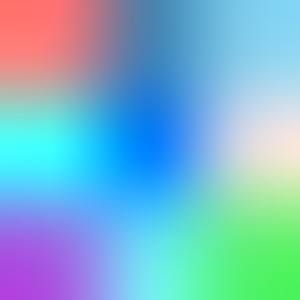

In [16]:
Image.fromarray(rgm).resize((300,300))

100%|██████████| 3/3 [00:00<00:00, 2488.22it/s]


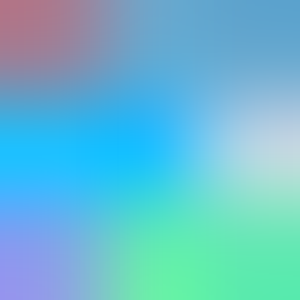

In [17]:
nnm = nearest_neighbour_mean(rgm)
Image.fromarray(nnm.to("cpu").numpy().astype(np.uint8)).resize((300,300))

100%|██████████| 3/3 [00:00<00:00, 1987.82it/s]


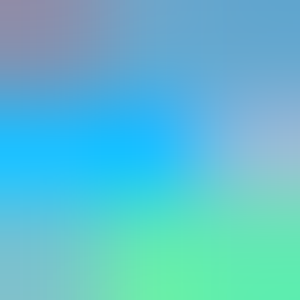

In [18]:
nnm_2 = nearest_neighbour_mean(nnm.type(torch.float16))
Image.fromarray(nnm_2.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 2155.35it/s]


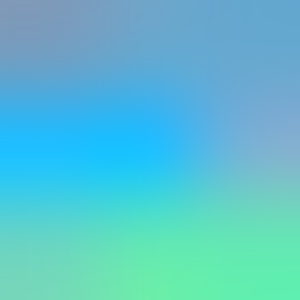

In [19]:
nnm_3 = nearest_neighbour_mean(nnm_2.type(torch.float16))
Image.fromarray(nnm_3.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 2453.77it/s]


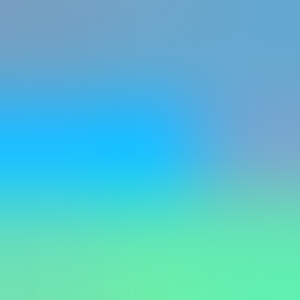

In [20]:
nnm_4 = nearest_neighbour_mean(nnm_3.type(torch.float16))
Image.fromarray(nnm_4.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 2121.91it/s]


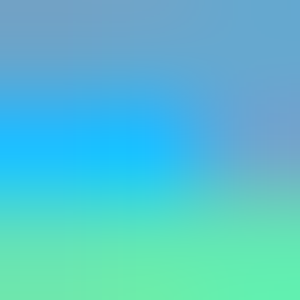

In [22]:
nnm_5 = nearest_neighbour_mean(nnm_4.type(torch.float16))
Image.fromarray(nnm_5.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 2320.71it/s]


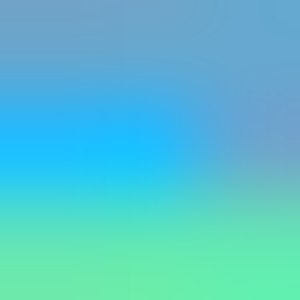

In [23]:
nnm_6 = nearest_neighbour_mean(nnm_5.type(torch.float16))
Image.fromarray(nnm_6.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 2051.00it/s]


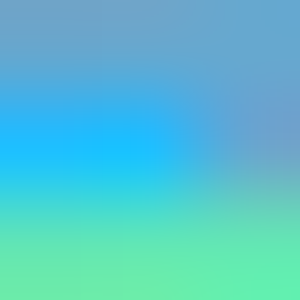

In [24]:
nnm_7 = nearest_neighbour_mean(nnm_6.type(torch.float16))
Image.fromarray(nnm_7.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 2701.36it/s]


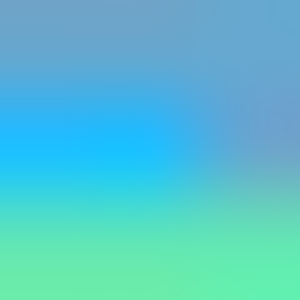

In [25]:
nnm_8 = nearest_neighbour_mean(nnm_7.type(torch.float16))
Image.fromarray(nnm_8.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

100%|██████████| 3/3 [00:00<00:00, 1990.02it/s]


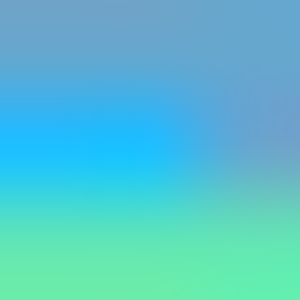

In [26]:
nnm_9 = nearest_neighbour_mean(nnm_8.type(torch.float16))
Image.fromarray(nnm_9.to("cpu").numpy().astype(np.uint8)).resize((300, 300))